In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import re
import string

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
#Reading csv file:
data = pd.read_csv("/content/data.csv")
print(data.head())

                                              review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5


In [3]:
#Checking for null values:
print(data.isnull().sum())

review    0
rating    0
dtype: int64


In [4]:
#Cleaning the dataset to make parsing easier:
def clean(text):
  text = str(text).lower()
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = "".join(text)
  return text
data["review"] = data["review"].apply(clean)
print(data)

                                                 review  rating
0     it was nice produt i like its design a lot  it...       5
1     awesome soundvery pretty to see this nd the so...       5
2     awesome sound quality pros 78 hrs of battery l...       4
3     i think it is such a good product not only as ...       5
4     awesome bass sound quality very good bettary l...       5
...                                                 ...     ...
9971                                      goodread more       5
9972  everything is amazimg but the built is very li...       5
9973                                      goodread more       5
9974           best headphone i have ever usedread more       5
9975                                      niceread more       5

[9976 rows x 2 columns]


In [5]:
#Number of reviews for each rating:
ratings = data["rating"].value_counts()
print(ratings)
#Number is rating index:
number = ratings.index
print("\n")
print(number)
#Quantity is number of reviews for each rating:
quantity = ratings.values
print("\n")
print(quantity)

5    5726
4    2365
3     884
1     691
2     310
Name: rating, dtype: int64


Int64Index([5, 4, 3, 1, 2], dtype='int64')


[5726 2365  884  691  310]


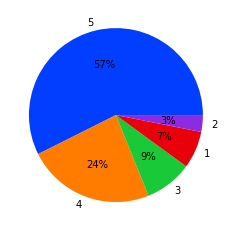

In [6]:
#Pie chart:
palette = sns.color_palette('bright')
plt.pie(quantity, labels = number, colors = palette, autopct = '%.0f%%')
plt.show()

In [7]:
#Sentiment Analyzer:
#NLTK (Natural Language ToolKit) is a library in python for Natural Language Processing (NLP):
#Positive, Negative, Neutral:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
print(data.head())

                                              review  Positive  Negative  \
0  it was nice produt i like its design a lot  it...     0.387       0.0   
1  awesome soundvery pretty to see this nd the so...     0.483       0.0   
2  awesome sound quality pros 78 hrs of battery l...     0.179       0.0   
3  i think it is such a good product not only as ...     0.331       0.0   
4  awesome bass sound quality very good bettary l...     0.405       0.0   

   Neutral  
0    0.613  
1    0.517  
2    0.821  
3    0.669  
4    0.595  


In [ ]:
#Most of the reviews are more neutral than positive. 

In [8]:
#Nature of reviews:
a = sum(data["Positive"])
b = sum(data["Negative"])
c = sum(data["Neutral"])
def sentiment(x, y, z):
  if (x > y) and (x > z):
    print("Most reviews are positive in nature.")
  elif (y > x) and (y > z):
    print("Most reviews are negative in nature.")
  else:
    print("Most reviews are neutral in nature.")
sentiment(a, b, c)

Most reviews are neutral in nature.


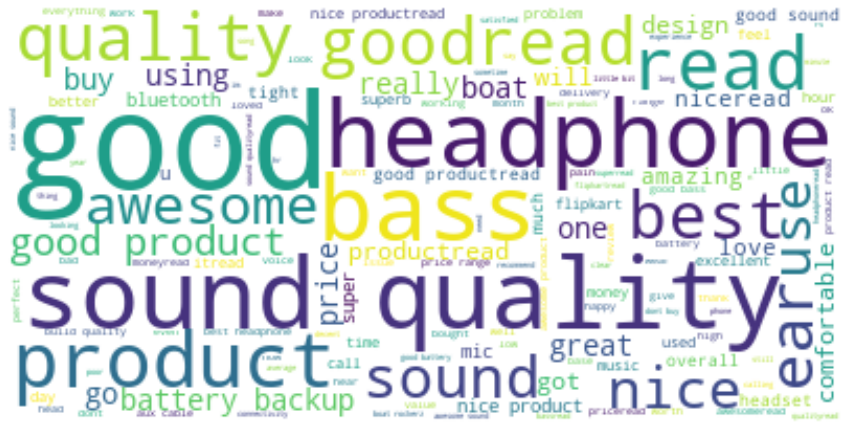

In [9]:
#Word cloud uses stopwords to ignore unnecessary words like "the, an, a" etc.:
#The word cloud shows the most commonly used words:
text = " ".join(i for i in data.review)
from wordcloud import WordCloud, STOPWORDS
stopword = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopword, background_color = "white").generate(text)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()